# Parametrs function

In [9]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact,interact_manual,interactive
from ipywidgets import FloatSlider
import ipywidgets as widgets

from IPython.display import display

In [10]:
def f_params (x,params: dict):
    a= params['a']
    c= params['c']
    return x**a+c
    

In [11]:
x_f_params_list = np.linspace(-5,5,100)

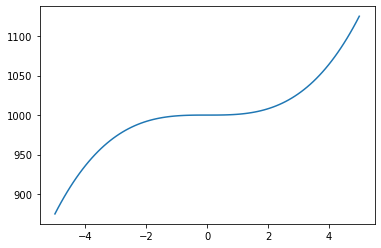

In [12]:
plt.plot(x_f_params_list,f_params(x_f_params_list,{'a':3,'c':1000}))

# Interactive

Simple way

In [13]:
def f(m, b):
    plt.figure()
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()


interactive_plot = interactive(f, m= 2, b= (-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(IntSlider(value=2, description='m', max=6, min=-2), FloatSlider(value=0.0, description='…

In [14]:
a_slide = widgets.IntSlider(description='a')
b_slide = widgets.IntSlider(description='b')
c_slide = widgets.IntSlider(description='c')


def f(a, b, c):
    print('{}*{}*{}={}'.format(a, b, c, a * b * c))
    return '{}*{}*{}={}'.format(a, b, c, a * b * c)


out = widgets.interactive_output(f, {'a': a_slide, 'b': b_slide, 'c': c_slide})

widgets.HBox([widgets.VBox([a_slide, b_slide, c_slide]), out])

Smart way

In [15]:
def f1(m, par):
    plt.figure()
    x = np.linspace(-10, 10, num=1000)

    a = par['a']
    b = par['b']
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()


interactive_plot = interactive(f1, m= (-3, 3, 0.5), par ={'a': (-3, 3, 0.5), 'b': (-3, 3, 1)} )
output = interactive_plot.children[-1]
output.layout.height = '300px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=3.0, min=-3.0, step=0.5), Dropdown(descripti…

<Figure size 432x288 with 0 Axes>

In [16]:
a_slide = widgets.IntSlider(description='a')
b_slide = widgets.IntSlider(description='b')
c_slide = widgets.IntSlider(description='c')

param_list = {'a': a_slide, 'b': b_slide, 'c': c_slide}


def f2(param):
    a = param['a']
    b = param['b']
    c = param['c']
    return '{}*{}*{}={}'.format(a, b, c, a * b * c)


out = widgets.interactive_output(
    f2, {
        param['a']: a_slide,
        param['b']: 3,
        param['c']: c_slide
    })

widgets.HBox([widgets.VBox([a_slide, b_slide, c_slide]), out])

NameError: name 'param' is not defined

In [ ]:
a_slide = widgets.IntSlider(description='a')
b_slide = widgets.IntSlider(description='b')
c_slide = widgets.IntSlider(description='c')

param_list = {'a': a_slide, 'b': b_slide, 'c': c_slide}


def f2(param):
    a = param['a']
    b = param['b']
    c = param['c']
    return '{}*{}*{}={}'.format(a, b, c, a * b * c)


out = widgets.interactive(f2, param= param_list)

widgets.HBox([widgets.VBox([a_slide, b_slide, c_slide]), out])

In [ ]:
import threading
from IPython.display import display, HTML
import ipywidgets as widgets
import time

def thread_func(something, out):
    for i in range(1, 5):
        time.sleep(0.3)
        out.append_stdout('{} {} {}\n'.format(i, '**'*i, something))
    out.append_display_data(HTML("<em>All done!</em>"))

display('Display in main thread')
out = widgets.Output()
# Now the key: the container is displayed (while empty) in the main thread
display(out)

thread = threading.Thread(
    target=thread_func,
    args=("some text", out))
thread.start()